# Loading packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
import pandas as pd
import PIL.Image
import collections

from tensorflow.keras.preprocessing import image_dataset_from_directory

# Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
session_conf = tf.compat.v1.ConfigProto(
      intra_op_parallelism_threads=10,
      inter_op_parallelism_threads=0)
sess = tf.compat.v1.Session(config=session_conf)

In [3]:
# all_info = pd.read_csv("/content/drive/MyDrive/GitHub_Projects/plane_variants/img/all_info.csv")
all_info = pd.read_csv("./img/all_info.csv")
all_info.sample(10)

,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,variant
26512,Boeing 777-246(ER),Japan Airlines (JAL),Photo date: 2020-02-25,Uploaded: 2021-05-20,"Location: Taipei-Sung Shan - RCSS, Taiwan",By: Bingolancer,cdn.jetphotos.com/400/6/73480_1620737344.jpg,./img/B777/cdn.jetphotos.com-400-6-73480_16207...,B777,246
11746,Airbus A320-251N,Aeroflot,Photo date: 2021-06-02,Uploaded: 2021-06-02,"Location: Hamburg Finkenwerder - EDHI, Germany",By: Martin Rogosz,cdn.jetphotos.com/400/5/71782_1622658798.jpg,./img/A320/cdn.jetphotos.com-400-5-71782_16226...,A320,251N
18229,Airbus A350-941,Cathay Pacific Airways,Photo date: 2021-03-29,Uploaded: 2021-04-12,Location: Hong Kong-Chek Lap Kok Int'l Airport...,By: Adrian Tong,cdn.jetphotos.com/400/6/59641_1617532101.jpg,./img/A350/cdn.jetphotos.com-400-6-59641_16175...,A350,941
31739,Boeing 747-8HVF,Air Bridge Cargo,Photo date: 2021-04-28,Uploaded: 2021-06-02,"Location: Beijing Capital - ZBAA, China",By: wanglp1988,cdn.jetphotos.com/400/5/22538_1621521092.jpg,./img/B747/cdn.jetphotos.com-400-5-22538_16215...,B747,8HVF
36687,Boeing 787-8 Dreamliner,American Airlines,Photo date: 2021-03-03,Uploaded: 2021-05-20,Location: Rio de Janeiro Galeão Antônio Carlos...,By: Breno Dantas,cdn.jetphotos.com/400/5/86223_1620676850.jpg,./img/B787/cdn.jetphotos.com-400-5-86223_16206...,B787,8
2215,Airbus A330-343,Hong Kong Airlines,Photo date: 2021-05-26,Uploaded: 2021-06-13,Location: Sydney Kingsford Smith Int'l Airport...,By: Gus Fuller,cdn.jetphotos.com/400/6/73433_1622448405.jpg,./img/A330/cdn.jetphotos.com-400-6-73433_16224...,A330,343
8809,Airbus A380-861,Air France,Photo date: 2019-03-25,Uploaded: 2021-03-07,"Location: Los Angeles Int'l Airport - KLAX, US...",By: Andy Xie,cdn.jetphotos.com/400/5/16215_1614483173.jpg,./img/A380/cdn.jetphotos.com-400-5-16215_16144...,A380,861
13784,Airbus A330-243,China Eastern Airlines,Photo date: 2021-03-07,Uploaded: 2021-05-22,Location: Frankfurt Rhein-Main Int'l Airport -...,By: Sebastian K,cdn.jetphotos.com/400/5/71324_1620804248.jpg,./img/A330/cdn.jetphotos.com-400-5-71324_16208...,A330,243
17966,Airbus A350-941,Qatar Airways (LATAM Airlines),Photo date: 2017-09-15,Uploaded: 2021-04-24,Location: Frankfurt Rhein-Main Int'l Airport -...,By: *DaVe*,cdn.jetphotos.com/400/6/27212_1618245266.jpg,./img/A350/cdn.jetphotos.com-400-6-27212_16182...,A350,941
8496,Airbus A380-861,Etihad Airways,Photo date: 2019-07-16,Uploaded: 2021-05-05,"Location: London Heathrow Int'l - EGLL, United...",By: Sebastien David,cdn.jetphotos.com/400/5/49145_1619366918.jpg,./img/A380/cdn.jetphotos.com-400-5-49145_16193...,A380,861


In [4]:
# all_info.loc[:, "download_path"] = all_info.download_path.str.replace("\\./", "/content/drive/MyDrive/GitHub_Projects/plane_variants/")
all_info_rows = all_info.shape[0]
np.random.seed(10)
all_info["purpose"] = np.random.choice(["train", "test", "validation"], size=all_info_rows, replace=True, p=[0.64, 0.16, 0.2])
a380vb747 = all_info.loc[all_info.model.isin(["A380", "B747"])].reset_index()
a380vb747.head()

,index,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,variant,purpose
0,8320,Airbus A380-861,Emirates,Photo date: 2021-05-30,Uploaded: 2021-06-15,Location: Manchester Ringway Int'l Airport - E...,By: Paul Spijkers,cdn.jetphotos.com/400/5/68077_1622647548.jpg,./img/A380/cdn.jetphotos.com-400-5-68077_16226...,A380,861,train
1,8321,Airbus A380-861,Emirates,Photo date: 2021-04-10,Uploaded: 2021-06-15,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: ChaleLu,cdn.jetphotos.com/400/6/75937_1622641760.jpg,./img/A380/cdn.jetphotos.com-400-6-75937_16226...,A380,861,test
2,8322,Airbus A380-841,China Southern Airlines,Photo date: 2021-05-19,Uploaded: 2021-06-15,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: Fang Xiaoyu,cdn.jetphotos.com/400/6/74070_1622628386.jpg,./img/A380/cdn.jetphotos.com-400-6-74070_16226...,A380,841,validation
3,8323,Airbus A380-841,Singapore Airlines,Photo date: 2019-09-02,Uploaded: 2021-06-15,"Location: Zurich-Kloten Airport - LSZH, Switze...",By: Nguyen Huy Bao,cdn.jetphotos.com/400/5/32090_1622625012.jpg,./img/A380/cdn.jetphotos.com-400-5-32090_16226...,A380,841,train
4,8324,Airbus A380-841,British Airways,Photo date: 2019-04-19,Uploaded: 2021-06-15,"Location: London Heathrow Int'l - EGLL, United...",By: Simon Fewkes,cdn.jetphotos.com/400/5/60639_1622620557.jpg,./img/A380/cdn.jetphotos.com-400-5-60639_16226...,A380,841,validation


In [5]:
train_df = a380vb747.loc[a380vb747.purpose == "train"]
test_df = a380vb747.loc[a380vb747.purpose == "test"]
validation_df = a380vb747.loc[a380vb747.purpose == "validation"]
print(train_df.download_path.head())

0    ./img/A380/cdn.jetphotos.com-400-5-68077_16226...
3    ./img/A380/cdn.jetphotos.com-400-5-32090_16226...
6    ./img/A380/cdn.jetphotos.com-400-5-56656_16225...
7    ./img/A380/cdn.jetphotos.com-400-6-26438_16224...
8    ./img/A380/cdn.jetphotos.com-400-6-68200_16224...
Name: download_path, dtype: object


In [6]:
train_df.download_path[0]

'./img/A380/cdn.jetphotos.com-400-5-68077_1622647548.jpg'

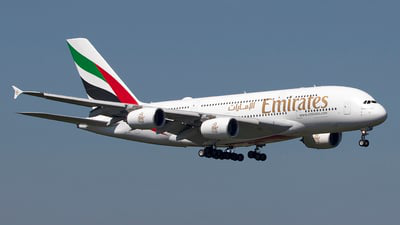

In [7]:
PIL.Image.open(str(train_df.download_path[0]))

In [8]:
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=prep_fn)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=prep_fn)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=prep_fn)

IMG_SIZE = (225, 400)

train_dataset = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col="download_path",
    y_col="model",
    target_size=IMG_SIZE,
    color_mode="rgb",
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=1234)

test_dataset = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col="download_path",
    y_col="model",
    target_size=IMG_SIZE,
    color_mode="rgb",
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=1234)

validation_dataset = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory=None,
    x_col="download_path",
    y_col="model",
    target_size=IMG_SIZE,
    color_mode="rgb",
    class_mode="binary",
    batch_size=32,
    shuffle=True,
    seed=1234)

Found 5273 validated image filenames belonging to 2 classes.
Found 1350 validated image filenames belonging to 2 classes.
Found 1697 validated image filenames belonging to 2 classes.


In [9]:
print(collections.Counter(train_dataset.labels))

Counter({0: 2656, 1: 2617})


In [10]:
train_dataset[0][0].shape

(32, 225, 400, 3)

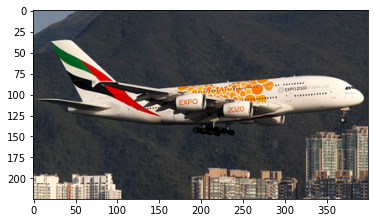

In [11]:
plt.imshow(((train_dataset[0][0][0,:,:,:])+1)/2)
plt.show()

In [12]:
print(np.max(train_dataset[0][0][0,:,:,:]))
print(np.min(train_dataset[0][0][0,:,:,:]))

1.0
-1.0


In [13]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [14]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 8, 13, 1280)


# Feature extraction

In [15]:
base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 225, 400, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 113, 200, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 113, 200, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 113, 200, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [16]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [17]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

inputs = tf.keras.Input(shape=(225, 400, 3))
# x = data_augmentation(inputs)
# x = preprocess_input(x)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [18]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 225, 400, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 225, 400, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 225, 400, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 8, 13, 1280)       2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281  

/home/u0037678/.conda/envs/env_cap/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Initial training

In [19]:
initial_epochs = 3

loss0, accuracy0 = model.evaluate(validation_dataset)

54/54 [==============================] - 17s 304ms/step - loss: 0.7410 - accuracy: 0.4962


In [20]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/3
165/165 [==============================] - 70s 409ms/step - loss: 0.7377 - accuracy: 0.4940 - val_loss: 0.7030 - val_accuracy: 0.4962
Epoch 2/3
165/165 [==============================] - 67s 405ms/step - loss: 0.7285 - accuracy: 0.5005 - val_loss: 0.6962 - val_accuracy: 0.4962
Epoch 3/3
165/165 [==============================] - 65s 392ms/step - loss: 0.7215 - accuracy: 0.4995 - val_loss: 0.6897 - val_accuracy: 0.4968


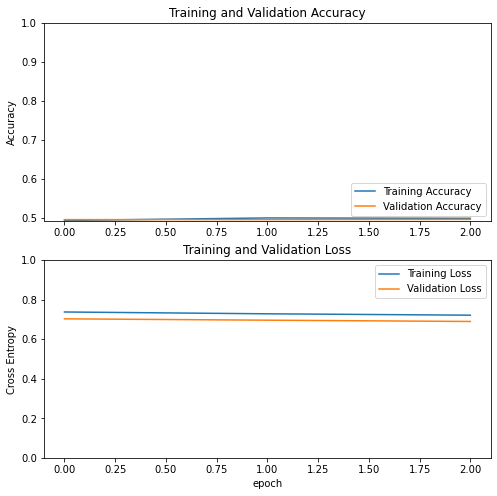

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine tuning

In [22]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])
model.summary()
len(model.trainable_variables)

Number of layers in the base model:  154
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 225, 400, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 225, 400, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 225, 400, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 8, 13, 1280)       2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)       

56

In [23]:
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 3/53
165/165 [==============================] - 104s 609ms/step - loss: 0.6775 - accuracy: 0.5576 - val_loss: 0.5923 - val_accuracy: 0.5993
Epoch 4/53
165/165 [==============================] - 104s 630ms/step - loss: 0.5830 - accuracy: 0.6586 - val_loss: 0.5180 - val_accuracy: 0.6730
Epoch 5/53
165/165 [==============================] - 102s 621ms/step - loss: 0.5330 - accuracy: 0.6988 - val_loss: 0.4885 - val_accuracy: 0.7672
Epoch 6/53
165/165 [==============================] - 107s 647ms/step - loss: 0.4940 - accuracy: 0.7123 - val_loss: 0.4713 - val_accuracy: 0.6983
Epoch 7/53
165/165 [==============================] - 106s 643ms/step - loss: 0.4703 - accuracy: 0.7466 - val_loss: 0.4223 - val_accuracy: 0.7932
Epoch 8/53
165/165 [==============================] - 106s 645ms/step - loss: 0.4343 - accuracy: 0.7705 - val_loss: 0.3936 - val_accuracy: 0.8144
Epoch 9/53
165/165 [==============================] - 104s 632ms/step - loss: 0.4103 - accuracy: 0.7889 - val_loss: 0.3802 -

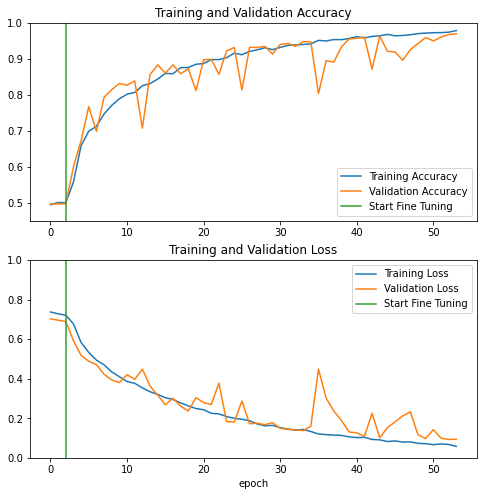

In [24]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.45, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

43/43 [==============================] - 12s 278ms/step - loss: 0.0855 - accuracy: 0.9644
Test accuracy : 0.9644444584846497


In [26]:
model.save('./model/a380vb747_dataframemodel')

/home/u0037678/.conda/envs/env_cap/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./model/a380vb747_dataframemodel/assets


In [ ]:
!zip -r /content/a380vb787_dataframemodel.zip /content/a380vb787_dataframemodel/

  adding: content/a380vb787_dataframemodel/ (stored 0%)
  adding: content/a380vb787_dataframemodel/keras_metadata.pb (deflated 96%)
  adding: content/a380vb787_dataframemodel/variables/ (stored 0%)
  adding: content/a380vb787_dataframemodel/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/a380vb787_dataframemodel/variables/variables.index (deflated 77%)
  adding: content/a380vb787_dataframemodel/assets/ (stored 0%)
  adding: content/a380vb787_dataframemodel/saved_model.pb (deflated 92%)
